In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import io


import datetime

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
import statsmodels.formula.api as smf7

## EDA Cab_Data

In [2]:
urlCab_Data = "https://raw.githubusercontent.com/atakanozdin/DataSets/main/Cab_Data.csv"
downloadCab_Data = requests.get(urlCab_Data).content

In [3]:
Cab_Data = pd.read_csv(io.StringIO(downloadCab_Data.decode('utf-8')))

cab_df = Cab_Data.copy()
cab_df = cab_df.dropna()
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
%%time
from datetime import datetime
import xlrd

cab_df["Date of Travel"] = cab_df["Date of Travel"].apply(lambda x: xlrd.xldate.xldate_as_datetime(x, 0))

Wall time: 432 ms


In [5]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
print("Cab_Data Shape is:\n", cab_df.shape)

Cab_Data Shape is:
 (359392, 7)


In [7]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


In [8]:
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [9]:
cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

#### Categorical Values of Cab_Data's Cities

In [10]:
cab_df.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [11]:
cab_df.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [12]:
cab_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [13]:
cab_df.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

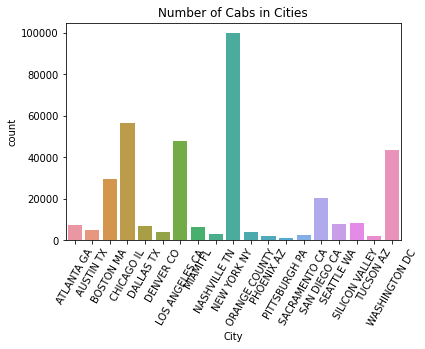

In [14]:
ax = sns.countplot(x="City", data = cab_df);
plt.xticks(rotation=60);
plt.rcParams["figure.figsize"] = (20,10)
ax.set_title("Number of Cabs in Cities");

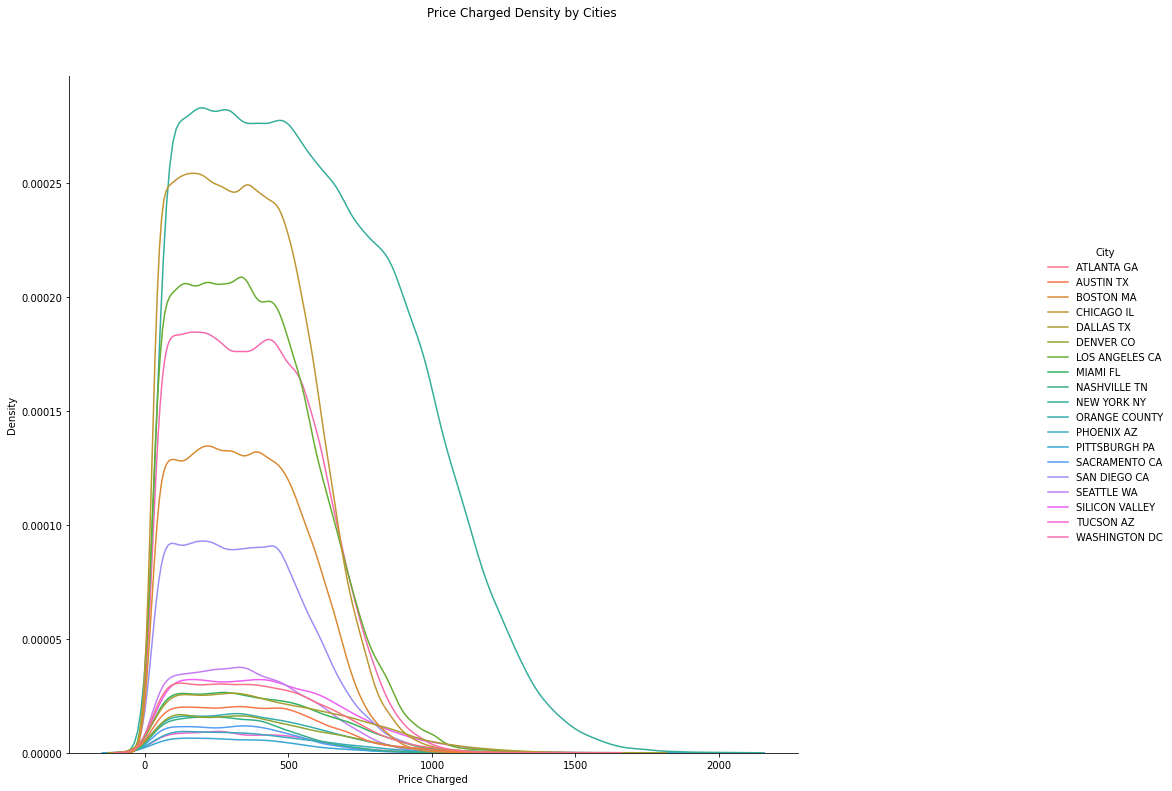

In [15]:
ax = sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="City");
ax.fig.set_size_inches(18,12)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Price Charged Density by Cities");

#### Categorical Values of Cab_Data's Company

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64


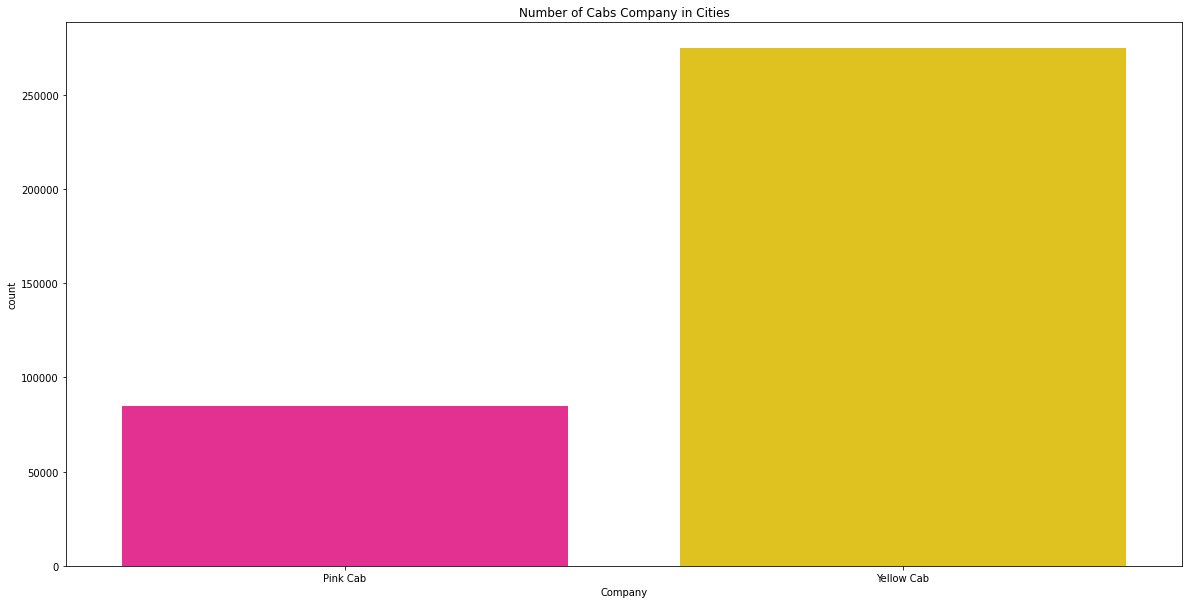

In [16]:
print(cab_df["Company"].value_counts())
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
ax= sns.countplot(x="Company", data = cab_df);

plt.rcParams["figure.figsize"] = (12,6)
ax.set_title("Number of Cabs Company in Cities");

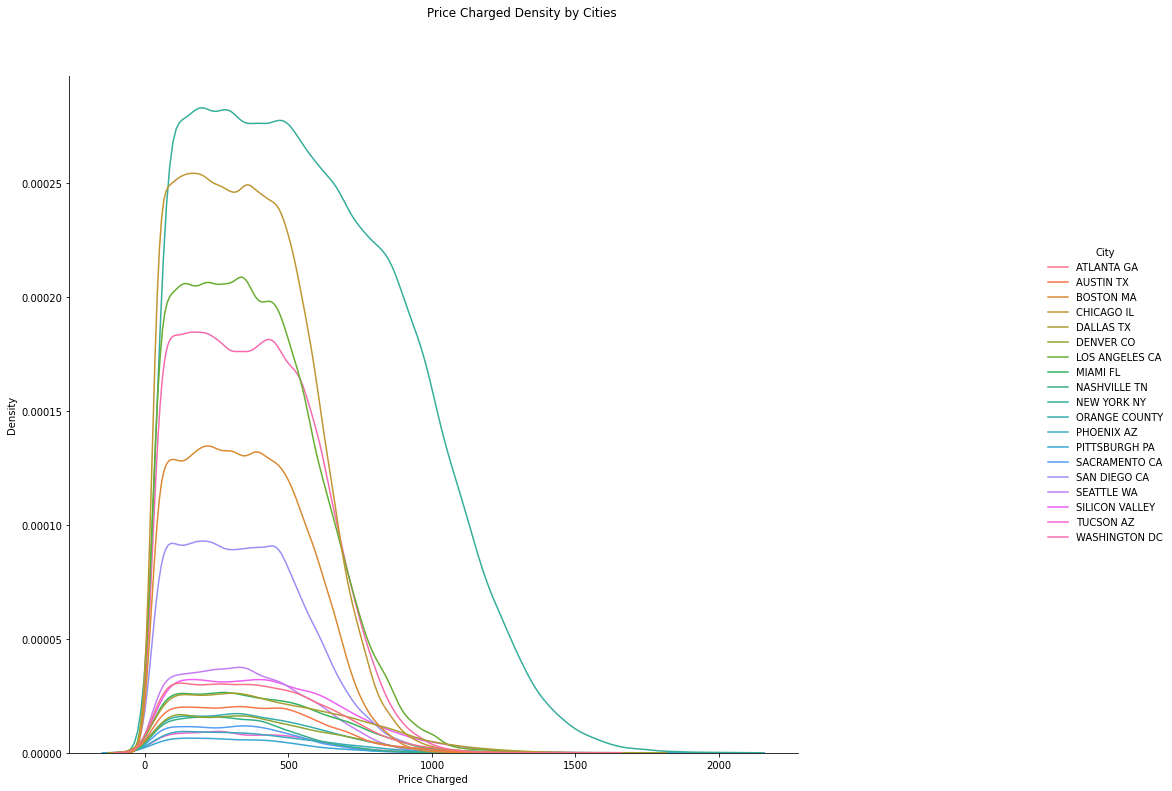

In [17]:
ax = sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="City");
ax.fig.set_size_inches(18,12)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Price Charged Density by Cities");

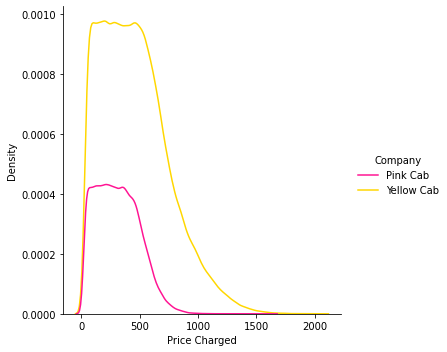

In [18]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab_df,x="Price Charged",kind="kde",hue="Company");

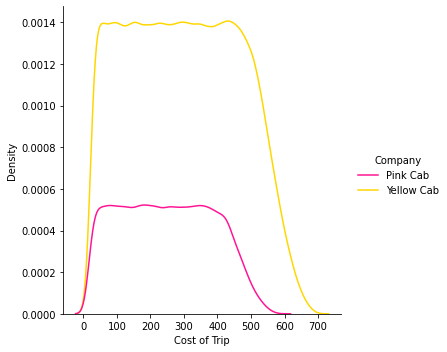

In [19]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab_df,x="Cost of Trip",kind="kde",hue="Company");

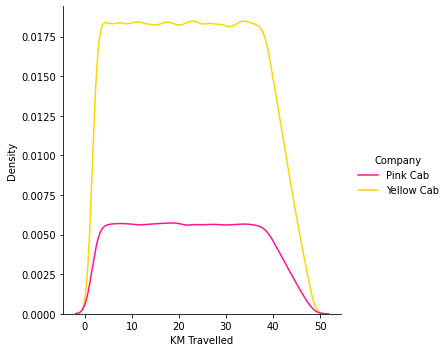

In [20]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=cab_df,x="KM Travelled",kind="kde",hue="Company");

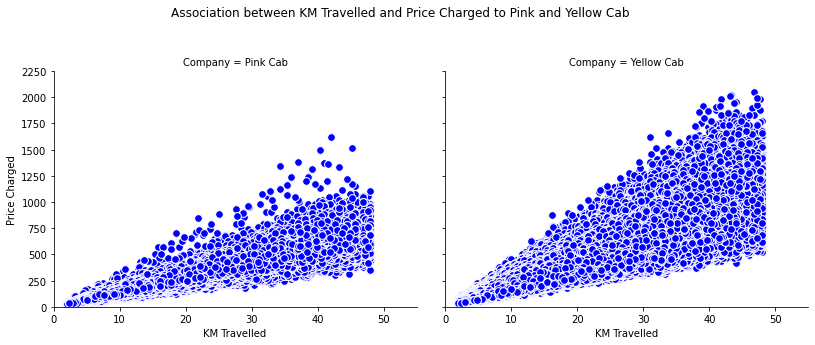

In [21]:
ax = sns.FacetGrid(cab_df, col="Company", margin_titles=True, height=4)
ax.map(plt.scatter, "KM Travelled", "Price Charged", color="blue", edgecolor="white", s=60, lw=1)
ax.set(xlim=(0, 55), ylim=(0, 2250));
ax.fig.set_size_inches(12,5)
ax.fig.subplots_adjust(top=.8) 
ax.fig.suptitle("Association between KM Travelled and Price Charged to Pink and Yellow Cab");

 As you see, yellow cab was prefered than pink cab

## EDA City

In [22]:
urlCity = "https://raw.githubusercontent.com/atakanozdin/DataSets/main/City.csv"
downloadCity = requests.get(urlCity).content

In [23]:
City = pd.read_csv(io.StringIO(downloadCity.decode('utf-8')))

city_df = City.copy()
city_df = city_df.dropna()
city_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [24]:
print("City Shape is:\n", city_df.shape)

City Shape is:
 (20, 3)


In [25]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 640.0+ bytes


In [26]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [27]:
city_df.Population = City.Population.str.replace(',','').astype(float)
city_df.Users = City.Users.str.replace(',','').astype(float)

In [28]:
city_df.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


In [29]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 640.0+ bytes


Text(0.5, 1.0, 'Population(M) in the Cities')

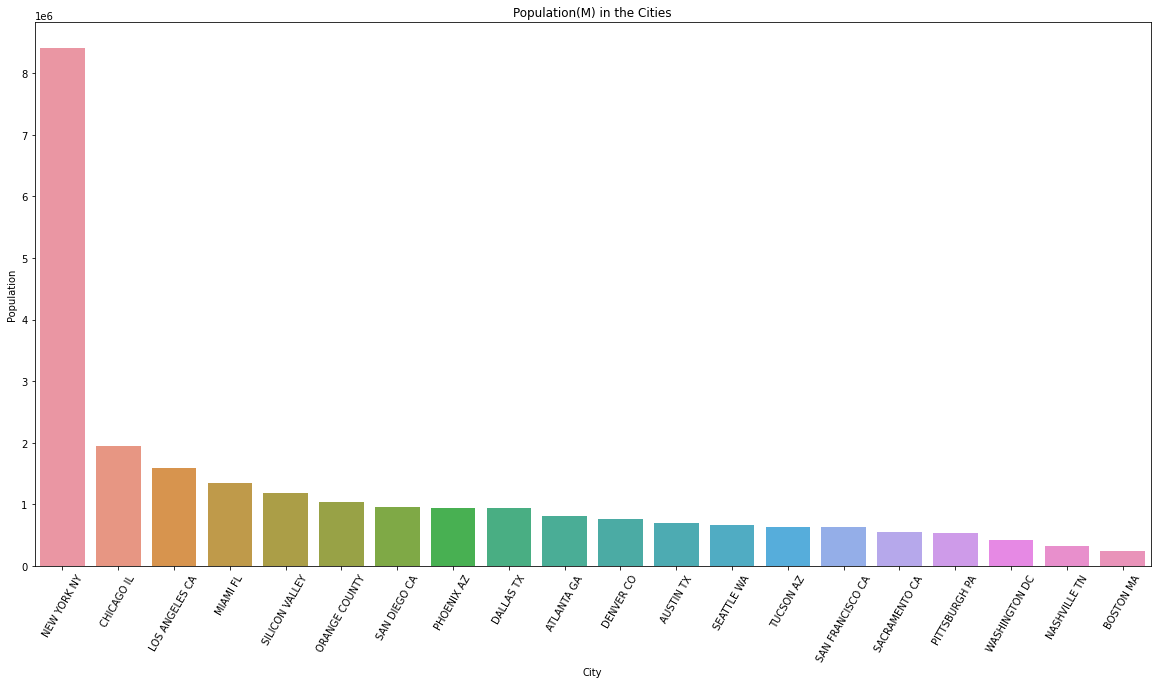

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(y='Population',x='City',data=city_df.sort_values('Population',ascending=False))
plt.xticks(rotation=60);
plt.title("Population(M) in the Cities")

Text(0.5, 1.0, 'Users in the Cities')

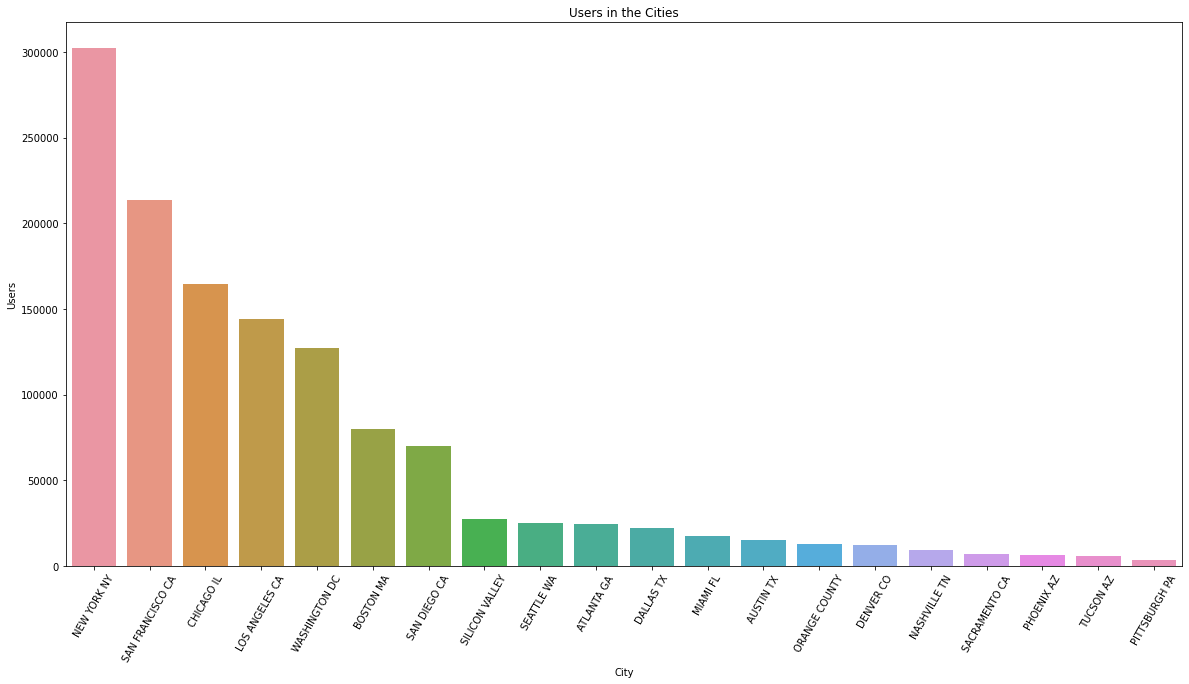

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y='Users',x='City',data=city_df.sort_values('Users',ascending=False))
plt.xticks(rotation=60);
plt.title("Users in the Cities")

## EDA Customer_ID 

In [32]:
urlCustomer_ID = "https://raw.githubusercontent.com/atakanozdin/DataSets/main/Customer_ID.csv"
downloadCustomer_ID = requests.get(urlCustomer_ID).content

In [33]:
Customer_ID = pd.read_csv(io.StringIO(downloadCustomer_ID.decode('utf-8')))

customer_df = Customer_ID.copy()
customer_df = customer_df.dropna()
customer_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [34]:
print("Customer_ID Shape is:\n", customer_df.shape)

Customer_ID Shape is:
 (49171, 4)


In [35]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.9+ MB


In [36]:
customer_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [37]:
customer_df.Gender.value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

Text(0.5, 1.0, "Customer's Genders")

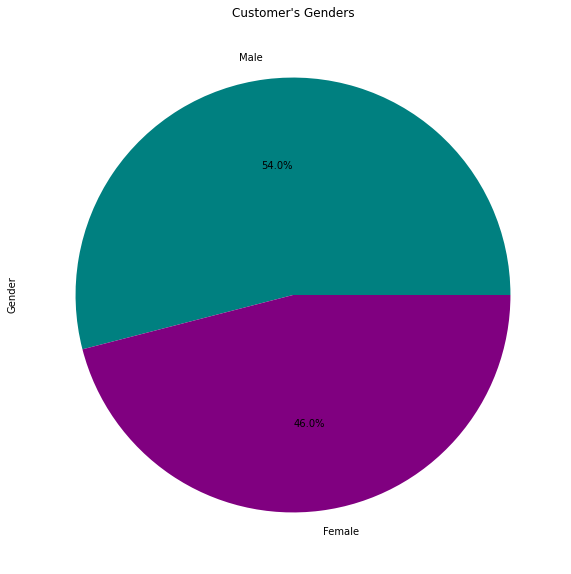

In [38]:
colors = ["teal", "purple"]
sns.set_palette(sns.color_palette(color))

plt.figure(figsize=(10,10))
explode=(0.4,0.05,0.05)
customer_df.Gender.value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title("Customer's Genders")

<Figure size 1440x720 with 0 Axes>

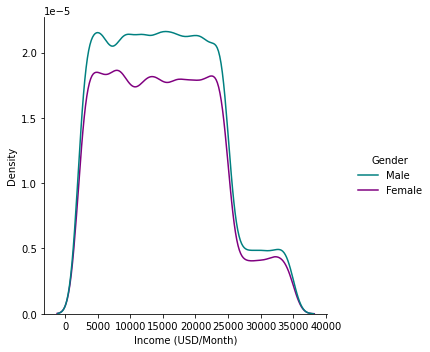

In [39]:
plt.figure(figsize=(20,10))

color = ["teal", "purple"]
sns.set_palette(sns.color_palette(color))
sns.displot(data=customer_df,x="Income (USD/Month)",kind="kde",hue="Gender");

## EDA Transaction_ID 

In [40]:
urlTransaction_ID = "https://raw.githubusercontent.com/atakanozdin/DataSets/main/Transaction_ID.csv"
downloadTransaction_ID = requests.get(urlTransaction_ID).content

In [41]:
Transaction_ID = pd.read_csv(io.StringIO(downloadTransaction_ID.decode('utf-8')))

transaction_df = Transaction_ID.copy()
transaction_df = transaction_df.dropna()
transaction_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [42]:
print("Transaction_ID Shape is:\n", transaction_df.shape)

Transaction_ID Shape is:
 (440098, 3)


In [43]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.4+ MB


In [44]:
transaction_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

Text(0.5, 1.0, "Customer's Payment_Mode")

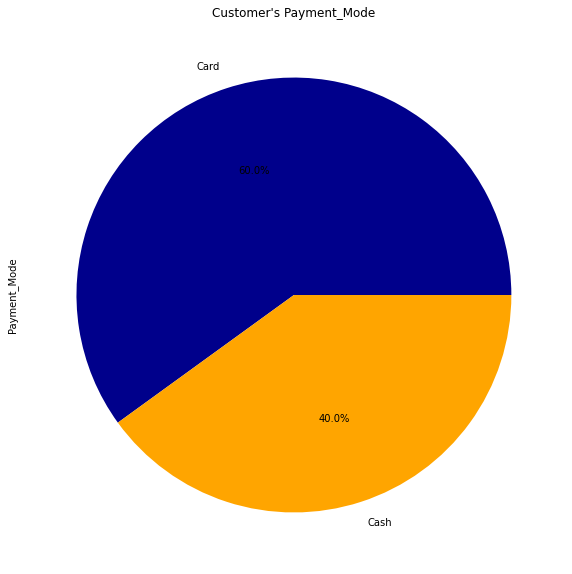

In [45]:
colors = ["darkblue", "orange"]
sns.set_palette(sns.color_palette(color))

plt.figure(figsize=(10,10))
explode=(0.4,0.05,0.05)
transaction_df.Payment_Mode.value_counts().plot.pie(colors = colors,autopct='%1.1f%%')
plt.title("Customer's Payment_Mode")

## Merge All Files

In [46]:
df1 = pd.merge(cab_df, transaction_df, on='Transaction ID', how="inner") 
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [47]:
print("df1 Shape is:\n", df1.shape)

df1 Shape is:
 (359392, 9)


In [48]:
df2 = pd.merge(df1, customer_df, on='Customer ID', how="inner") 
df2.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [49]:
print("df2 Shape is:\n", df2.shape)

df2 Shape is:
 (359392, 12)


In [50]:
final_df = pd.merge(df2, city_df, on='City', how="inner") 
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


## EDA final_df

In [51]:
print("final_df Shape is:\n", final_df.shape)

final_df Shape is:
 (359392, 14)


#### Missing Values

In [52]:
final_df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

There are no missing values in the dataset

#### Duplicated Rows

In [53]:
duplicated_rows = final_df[final_df.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  float64       
 13  Users               359392 no

In [55]:
final_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


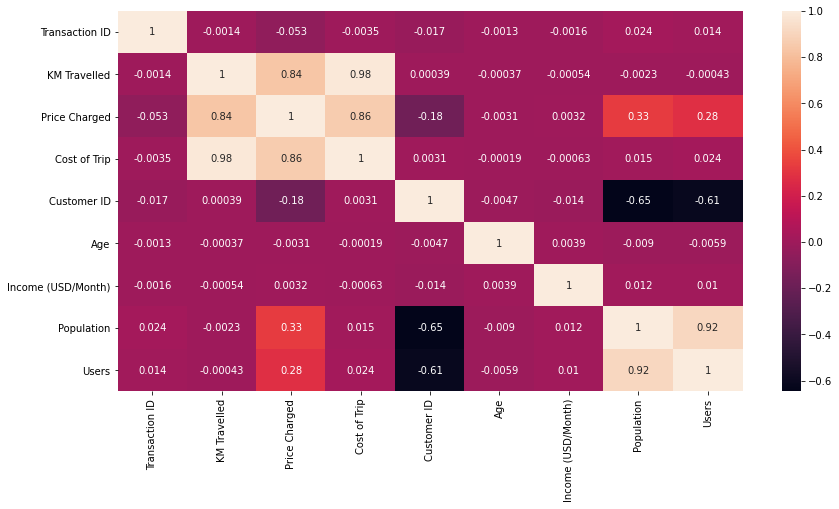

In [56]:
#Heatmap
plt.figure(figsize = (14,7))
sns.heatmap(final_df.corr(), annot = True);

### Analysis of Categorical Values

In [57]:
final_df.City.value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [58]:
final_df["City"] = final_df["City"].replace(["SILICON VALLEY"],"SILICON_VALLEY CA")
final_df["City"] = final_df["City"].replace(["ORANGE COUNTY"],"ORANGE_COUNTY CA")

In [59]:
#final_df.City = final_df.City.replace(["LOS ANGELES CA "],"LOS_ANGELES CA ")
final_df.City = final_df.City.replace(["NEW YORK NY"],"NEW_YORK NY")
final_df.City = final_df.City.replace(["SAN DIEGO CA"],"SAN_DIEGO CA")

In [60]:
final_df.City.value_counts()

NEW_YORK NY          99885
CHICAGO IL           56625
LOS ANGELES CA       48033
WASHINGTON DC        43737
BOSTON MA            29692
SAN_DIEGO CA         20488
SILICON_VALLEY CA     8519
SEATTLE WA            7997
ATLANTA GA            7557
DALLAS TX             7017
MIAMI FL              6454
AUSTIN TX             4896
ORANGE_COUNTY CA      3982
DENVER CO             3825
NASHVILLE TN          3010
SACRAMENTO CA         2367
PHOENIX AZ            2064
TUCSON AZ             1931
PITTSBURGH PA         1313
Name: City, dtype: int64

In [61]:
final_df["States"] = final_df.City.apply(lambda x: x.split(" ")[1])
final_df["States"].value_counts()

NY         99885
IL         56625
ANGELES    48033
DC         43737
CA         35356
MA         29692
TX         11913
WA          7997
GA          7557
FL          6454
AZ          3995
CO          3825
TN          3010
PA          1313
Name: States, dtype: int64

In [62]:
final_df["States"].value_counts()

NY         99885
IL         56625
ANGELES    48033
DC         43737
CA         35356
MA         29692
TX         11913
WA          7997
GA          7557
FL          6454
AZ          3995
CO          3825
TN          3010
PA          1313
Name: States, dtype: int64

In [63]:
final_df.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
States                        object
dtype: object

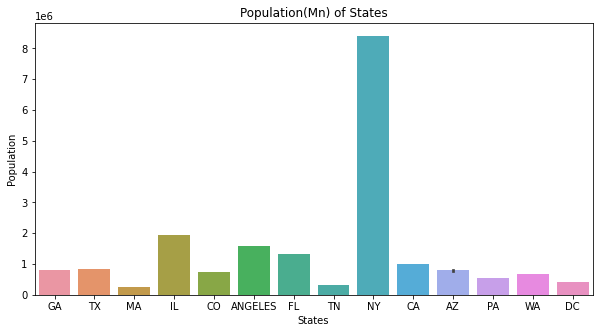

In [64]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="States",y="Population",  data=final_df);
ax.set_title("Population(Mn) of States");

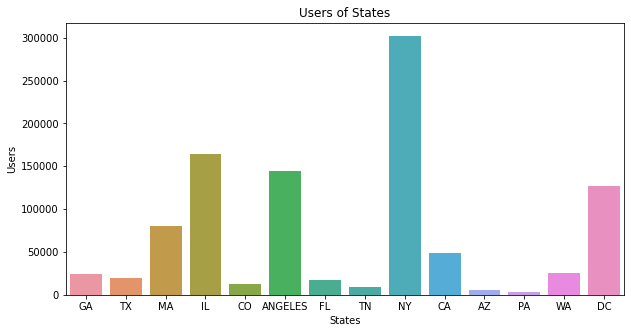

In [65]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="States",y="Users", data=final_df);
ax.set_title("Users of States");

#### Date Time

In [66]:
final_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,States
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,GA
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA


In [67]:
final_data = final_df.copy()

final_data['Years'] = pd.DatetimeIndex(final_data['Date of Travel']).year
final_data['Months_Number'] = pd.DatetimeIndex(final_data['Date of Travel']).month
final_data['Years_Months'] = pd.to_datetime(final_data['Date of Travel']).dt.to_period('M')

final_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,States,Years,Months_Number,Years_Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA,2016,1,2016-01
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,2018,7,2018-07
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA,2018,11,2018-11
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,GA,2016,1,2016-01
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA,2018,4,2018-04


In [68]:
d = {1:"JAN", 2:"FEB", 3:"MAR", 4:"APR",
    5:"MAY", 6:"JUN", 7:"JULY", 8:"AUG",
    9: "SEP", 10:"OCT",11:"NOV", 12:"DEC"}

final_data["Months"] = final_data.Months_Number.map(d)

final_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,States,Years,Months_Number,Years_Months,Months
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA,2016,1,2016-01,JAN
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,2018,7,2018-07,JULY
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA,2018,11,2018-11,NOV
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,GA,2016,1,2016-01,JAN
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA,2018,4,2018-04,APR


<h3><p style= "color:red">Profit Analysis</p></h3>            

In [69]:
final_data["Profit"] = final_data["Price Charged"] - final_data["Cost of Trip"]
final_data["Profit"].head()

0     57.3150
1    281.2772
2    194.6480
3     23.6660
4    253.9808
Name: Profit, dtype: float64

In [70]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  float64       
 13  Users               359392 no

In [71]:
final_data.shape

(359392, 20)

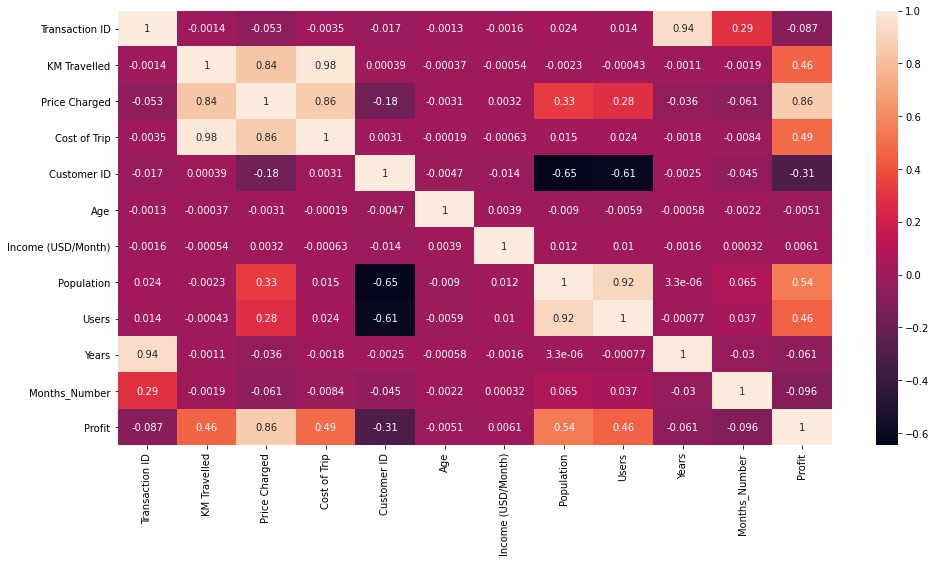

In [72]:
plt.figure(figsize = (16,8))
sns.heatmap(final_data.corr(), annot = True);

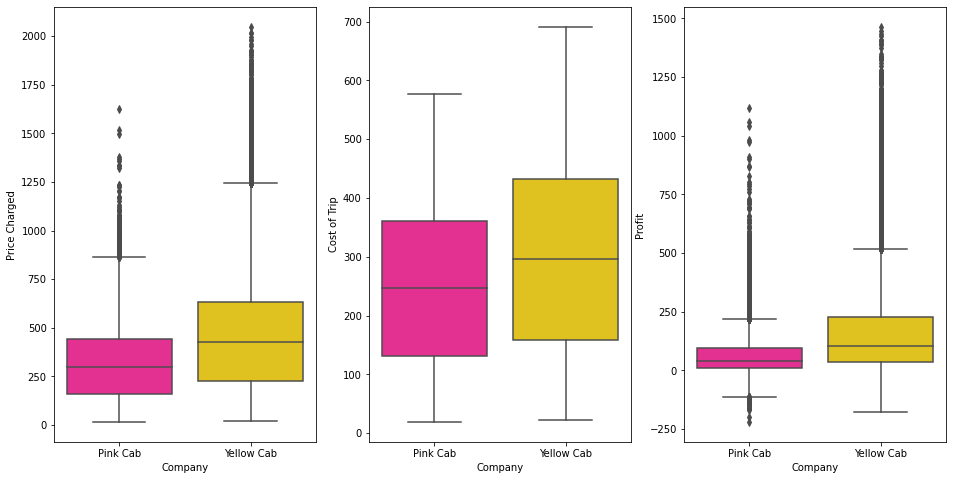

In [73]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
sns.boxplot(data=final_data, x="Company", y="Price Charged");

fig.add_subplot(rows, columns, 2)
sns.boxplot(data=final_data, x="Company", y="Cost of Trip");

fig.add_subplot(rows, columns, 3)
sns.boxplot(data=final_data, x="Company", y="Profit");

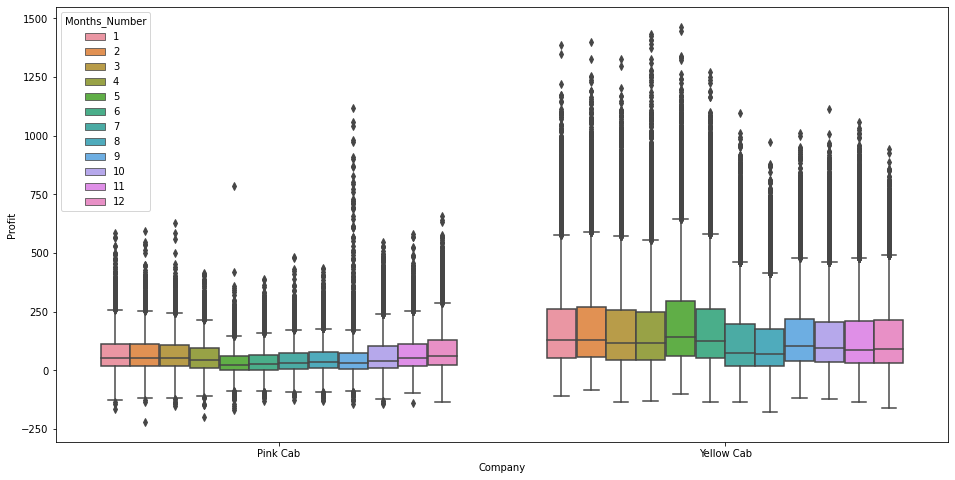

In [74]:
fig = plt.figure(figsize=(16, 8))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
sns.boxplot(data=final_data, x="Company", y="Profit",  hue = final_data["Months_Number"]);

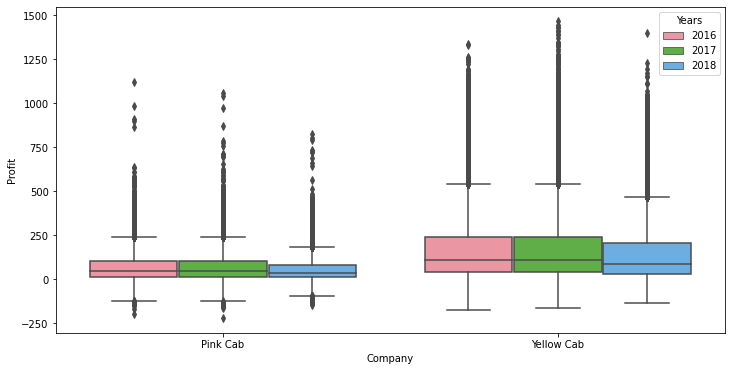

In [75]:
fig = plt.figure(figsize=(12, 6))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
sns.boxplot(data=final_data, x="Company", y="Profit",  hue = final_data["Years"]);

<Figure size 864x864 with 0 Axes>

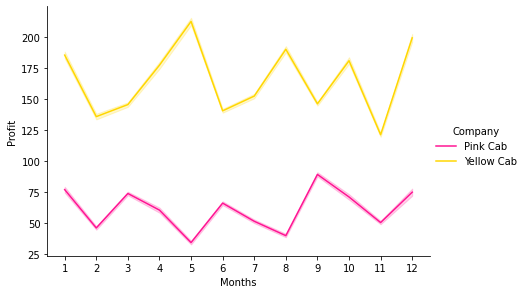

In [76]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(12, 12))

graph1 = sns.relplot(
    data=final_data,
    x="Months", y="Profit",
    hue="Company",
    kind="line", 
    height=4, aspect=1.5, facet_kws=dict(sharex=False));

graph1.set_xticklabels(np.arange(1,13,1));

<Figure size 864x864 with 0 Axes>

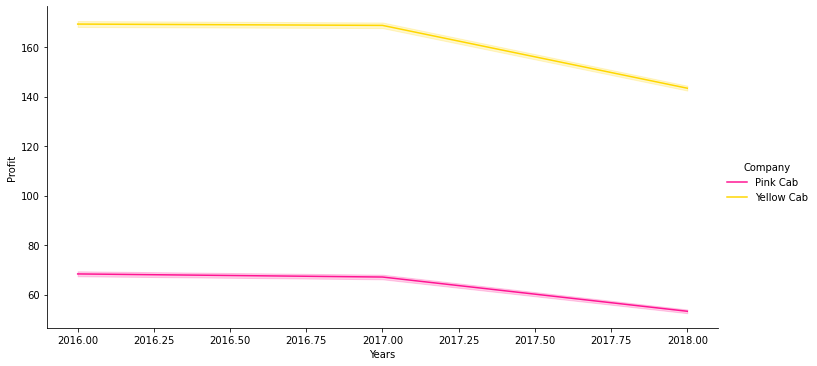

In [77]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(12, 12))

graph1 = sns.relplot(
    data=final_data,
    x="Years", y="Profit",
    hue="Company",
    kind="line", 
    aspect=2, facet_kws=dict(sharex=False));

In [78]:
final_data.States.value_counts()

NY         99885
IL         56625
ANGELES    48033
DC         43737
CA         35356
MA         29692
TX         11913
WA          7997
GA          7557
FL          6454
AZ          3995
CO          3825
TN          3010
PA          1313
Name: States, dtype: int64

<Figure size 864x864 with 0 Axes>

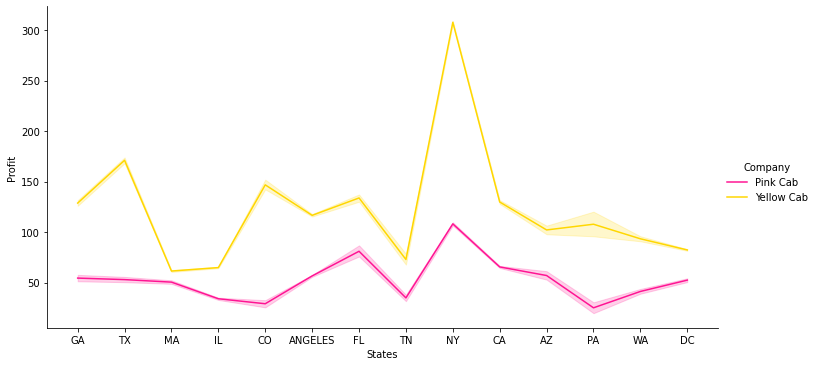

In [79]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(12, 12))

graph1 = sns.relplot(
    data=final_data,
    x="States", y="Profit",
    hue="Company",
    kind="line", 
    aspect=2, facet_kws=dict(sharex=False));

### Age

In [80]:
final_data["Age_band"]=0

final_data.loc[(final_data["Age"]>=18)&(final_data["Age"]<=35),"Age_band"]="Young Adults"
final_data.loc[(final_data["Age"]>=36)&(final_data["Age"]<=55),"Age_band"]="Middle-aged Adults"
final_data.loc[(final_data["Age"]>=56)&(final_data["Age"]<=99),"Age_band"]="Old Adults"
final_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,States,Years,Months_Number,Years_Months,Months,Profit,Age_band
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24701.0,GA,2016,1,2016-01,JAN,57.3150,Young Adults
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24701.0,GA,2018,7,2018-07,JULY,281.2772,Young Adults
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24701.0,GA,2018,11,2018-11,NOV,194.6480,Young Adults
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24701.0,GA,2016,1,2016-01,JAN,23.6660,Young Adults
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24701.0,GA,2018,4,2018-04,APR,253.9808,Young Adults


Proportion of Total Young Adults: 57.5 %
Proportion of Total Middle-aged Adults: 31.9 %
Proportion of Total Old Adults: 10.6 %


C:\Users\ataka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


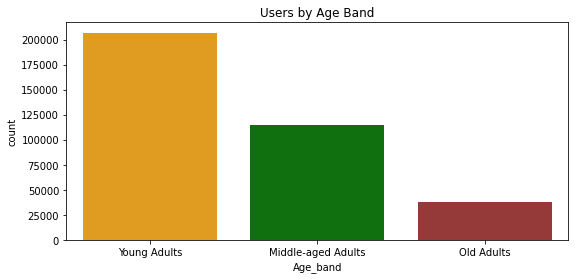

In [81]:
color = ["orange", "green","brown"]
sns.set_palette(sns.color_palette(color))
print(f"Proportion of Total Young Adults: {final_data.Age_band.value_counts(normalize = True)[0]*100:.1f} %")
print(f"Proportion of Total Middle-aged Adults: {final_data.Age_band.value_counts(normalize = True)[1]*100:.1f} %")
print(f"Proportion of Total Old Adults: {final_data.Age_band.value_counts(normalize = True)[2]*100:.1f} %")
plt.figure(figsize = (9,4))
ax = sns.countplot(final_data.Age_band).set_title("Users by Age Band");

<Figure size 864x864 with 0 Axes>

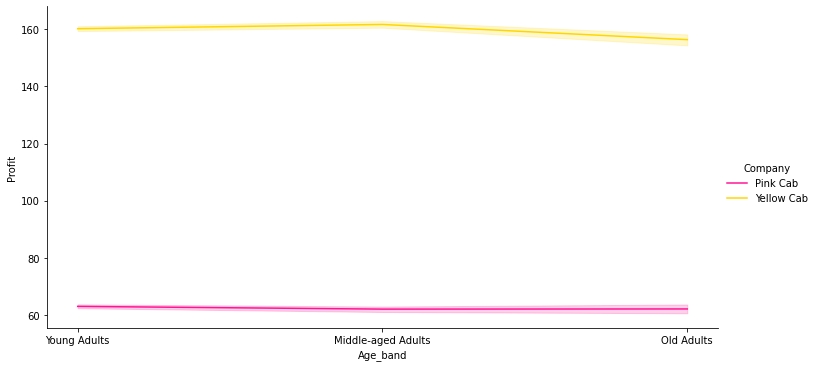

In [82]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(12, 12))

graph1 = sns.relplot(
    data=final_data,
    x="Age_band", y="Profit",
    hue="Company",
    kind="line", 
    aspect=2, facet_kws=dict(sharex=False));

<Figure size 864x864 with 0 Axes>

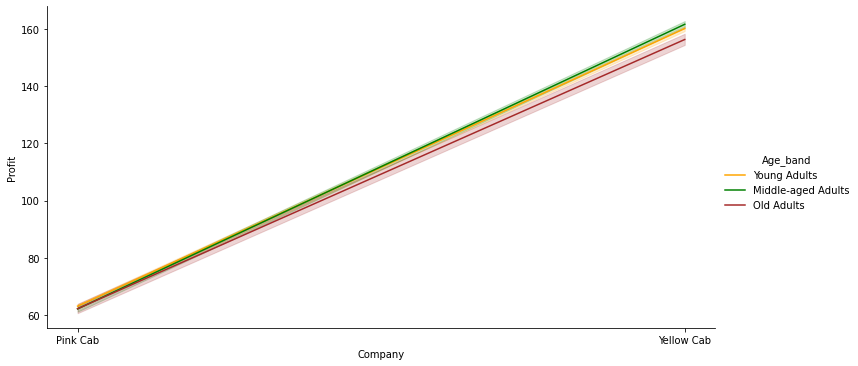

In [83]:
color = ["orange", "green","brown"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(12, 12))

graph1 = sns.relplot(
    data=final_data,
    x="Company", y="Profit",
    hue="Age_band",
    kind="line", 
    aspect=2, facet_kws=dict(sharex=False));

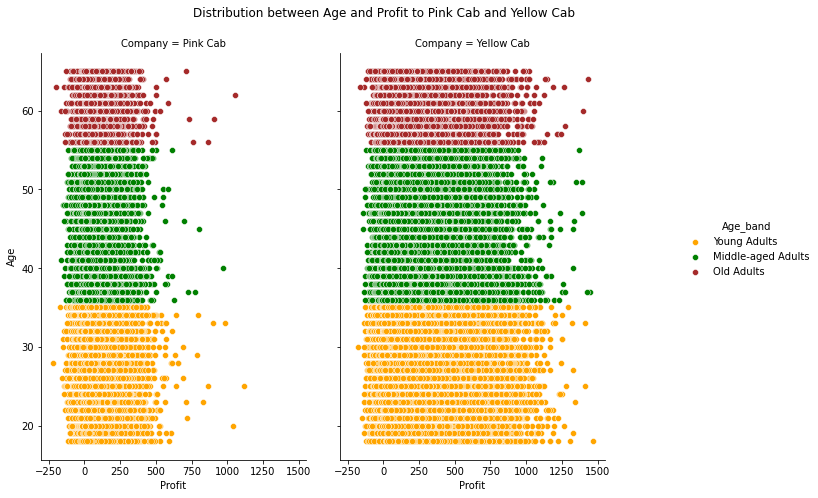

In [84]:
color = ["orange", "green","brown"]
sns.set_palette(sns.color_palette(color))
g = sns.FacetGrid(final_data, col="Company", hue = "Age_band")
g.map(sns.scatterplot, "Profit", "Age")
g.add_legend();
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=.9) 
g.fig.suptitle("Distribution between Age and Profit to Pink Cab and Yellow Cab");

<Figure size 2880x1800 with 0 Axes>

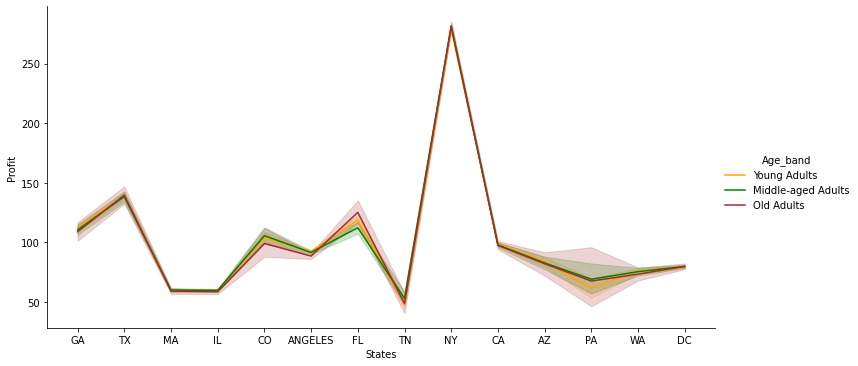

In [85]:
color = ["orange", "green","brown"]
sns.set_palette(sns.color_palette(color))
fig = plt.figure(figsize=(40, 25))

graph1 = sns.relplot(
    data=final_data,
    x="States", y="Profit",
    hue="Age_band",
    kind="line", aspect=2, facet_kws=dict(sharex=False));

### Male & Female

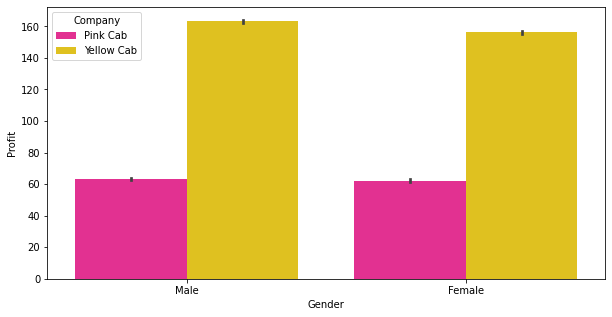

In [86]:
color = ["deeppink","gold"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="Gender", y="Profit", hue="Company", data=final_data);

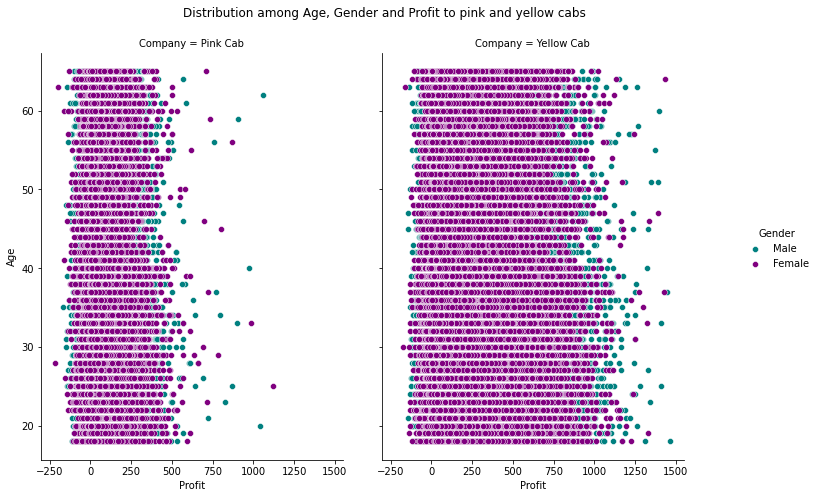

In [87]:
color = ["teal", "purple"]
sns.set_palette(sns.color_palette(color))
g = sns.FacetGrid(final_data, col="Company", hue = "Gender")
g.map(sns.scatterplot, "Profit", "Age")
g.add_legend();
g.fig.set_size_inches(12,8)
g.fig.subplots_adjust(top=.9) 
g.fig.suptitle("Distribution among Age, Gender and Profit to pink and yellow cabs");

### Card & Cash

In [88]:
card_cash_df= final_data.groupby(["City","States","Payment_Mode"]).size().reset_index().rename(columns = {0 : "Pay_Mode_Count"})

card_cash_df.head()

,City,States,Payment_Mode,Pay_Mode_Count
0,ATLANTA GA,GA,Card,4513
1,ATLANTA GA,GA,Cash,3044
2,AUSTIN TX,TX,Card,2980
3,AUSTIN TX,TX,Cash,1916
4,BOSTON MA,MA,Card,17741


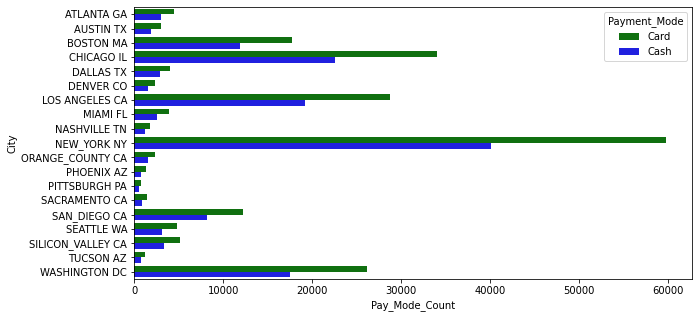

In [89]:
color = ["green", "blue"]
sns.set_palette(sns.color_palette(color))
plt.figure(figsize = (10,5))
sns.barplot(x="Pay_Mode_Count", y="City", hue="Payment_Mode", data=card_cash_df);

## Hypothesis_Testing

In [90]:
final_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,...,Income (USD/Month),Population,Users,States,Years,Months_Number,Years_Months,Months,Profit,Age_band
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,...,10813,814885.0,24701.0,GA,2016,1,2016-01,JAN,57.3150,Young Adults
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,...,10813,814885.0,24701.0,GA,2018,7,2018-07,JULY,281.2772,Young Adults
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,...,10813,814885.0,24701.0,GA,2018,11,2018-11,NOV,194.6480,Young Adults
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,...,9237,814885.0,24701.0,GA,2016,1,2016-01,JAN,23.6660,Young Adults
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,...,9237,814885.0,24701.0,GA,2018,4,2018-04,APR,253.9808,Young Adults


In [91]:
# T-test to check dependency of Cabs on Profit
Ho = "Profit of Yellow Cab and Pink Cab are same"   # Stating the Null Hypothesis
H1 = "Profit of Yellow Cab and Pink Cab are not the same"   # Stating the Alternate Hypothesis

x = np.array(final_data[final_data.Company == "Yellow Cab"].Profit)  
y = np.array(final_data[final_data.Company == "Pink Cab"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value}) > 0.05")

Profit of Yellow Cab and Pink Cab are not the same as the p_value (0.0) < 0.05


In [92]:
# T-test to check dependency of Profit on Gender
Ho = "Gender has no effect on profit"   # Stating the Null Hypothesis
H1 = "Gender has an effect on profit"   # Stating the Alternate Hypothesis

x = np.array(final_data[final_data.Gender == "Male"].Profit)  
y = np.array(final_data[final_data.Gender == "Female"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round()}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Gender has an effect on profit as the p_value (0.0) < 0.05


In [93]:
# T-test to check dependency of Payment_Mode on Profit
Ho = "Payment_Mode has no effect on Profit"   # Stating the Null Hypothesis
H1 = "Payment_Mode has an effect on Profit"   # Stating the Alternate Hypothesis

x = np.array(final_data[final_data.Payment_Mode == "Cash"].Profit)  
y = np.array(final_data[final_data.Payment_Mode == "Card"].Profit) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round()}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Payment_Mode has no effect on Profit as the p_value (0.445) > 0.05


In [94]:
# Chi_square test to check if Company are different for different genders
Ho = "Gender has no effect on Company"   # Stating the Null Hypothesis
H1 = "Gender has an effect on Company"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(final_data["Gender"], final_data["Company"])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Gender has an effect on Company as the p_value (0.0) < 0.05


Company,Pink Cab,Yellow Cab
Gender,,
Female,37480,116000
Male,47231,158681


In [95]:
Ho = "Date_of_Travel has no effect on Company"   # Stating the Null Hypothesis
H1 = "Date_of_Travel has an effect on Company"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(final_data["Date of Travel"], final_data["Company"])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Date_of_Travel has an effect on Company as the p_value (0.0) < 0.05


Company,Pink Cab,Yellow Cab
Date of Travel,,
2016-01-02,41,140
2016-01-03,52,126
2016-01-04,4,21
2016-01-05,6,41
2016-01-06,23,86
...,...,...
2018-12-27,66,252
2018-12-28,217,626
2018-12-29,195,630


In [96]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Company has no effect on States"   # Stating the Null Hypothesis
H1 = "Company has an effect on States"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(final_data["Company"], final_data["States"])  

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{H1} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")
crosstab

Company has an effect on States as the p_value (0.0) < 0.05


States,ANGELES,AZ,CA,CO,DC,FL,GA,IL,MA,NY,PA,TN,TX,WA
Company,,,,,,,,,,,,,,
Pink Cab,19865,1663,17316,1394,3692,2002,1762,9361,5186,13967,682,1841,3248,2732
Yellow Cab,28168,2332,18040,2431,40045,4452,5795,47264,24506,85918,631,1169,8665,5265


### Conclusion

Both companies have a certain amount of profit. Moreover, according to data analysis, XYZ firm should invest in Yellow Cab. But in reality the cab on the verge of bankruptcy. Once again, I understood that before the business problem should be analyzed rather than data analysis. The business problem was ignored, as the Data Glacier company wanted to measure our EDA ability.